**The Sparks Foundation - Data Science and Business Analytics - GRIP FEBRUARY22**






# Task 02: Prediction-Using Unsupervised-ML

# Author : Basit Hussain


**Task: From given data set, predict the optimum number of clusteers and represent it visually.**

**Dataset:** https://bit.ly/3kXTdox

# Import All Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# Load The Iris Dataset





In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# See the first 5 rows

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Number of rows and collumns



In [4]:
 iris_df.shape

(150, 4)

In [5]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Summary statistics

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# To find the optimum number of clusters for k-means classification

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


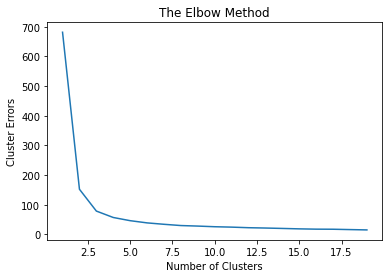

In [7]:
x = iris_df.iloc[:, [0, 1, 2, 3,]].values

cluster_errors = []

for number_cluster in range(1, 20):
    clusters = KMeans(n_clusters = number_cluster, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    clusters.fit(x)
    cluster_errors.append(clusters.inertia_)
    
    
plt.plot(range(1, 20), cluster_errors)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Errors")
plt.show()
    


# Applying kmeans to the dataset / Creating the kmeans classifier

In [8]:
clusters = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
clusters.fit(x)

y_clusters = clusters.fit_predict(x)

# Visualising the clusters - On the first two columns

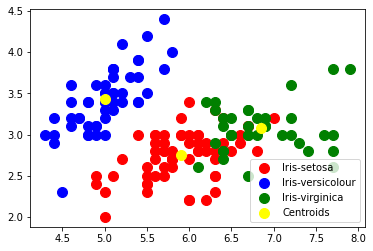

In [9]:
plt.scatter(x[y_clusters == 0, 0], x[y_clusters == 0, 1], s = 100, c = "red", label = "Iris-setosa")
plt.scatter(x[y_clusters == 1, 0], x[y_clusters == 1, 1], s = 100, c = "blue", label = "Iris-versicolour")
plt.scatter(x[y_clusters == 2, 0], x[y_clusters == 2, 1], s = 100, c = "green", label = "Iris-virginica")



# Plotting the centroids of the clusters
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:,1], s = 100, c = "yellow", label = "Centroids")

plt.legend()
